In [1]:
from matplotlib import pyplot as plt
import numpy as np


In [2]:
original_image=plt.imread('bird_small.png')

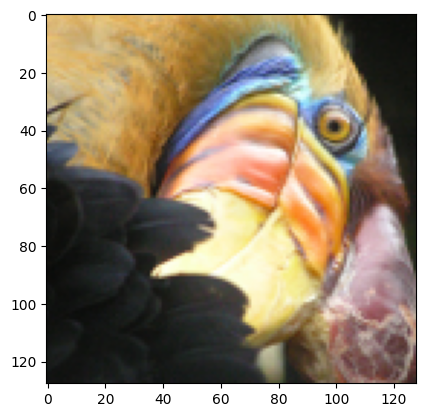

In [3]:
plt.imshow(original_image)

In [4]:
original_image.shape

(128, 128, 3)

In [5]:
original_image=original_image/255
X_img=np.reshape(original_image,(original_image.shape[0]*original_image.shape[1],3))

In [6]:
X_img.shape

(16384, 3)

In [7]:
original_image

array([[[0.00336794, 0.00276817, 0.00158401],
        [0.0035371 , 0.00284506, 0.00178393],
        [0.00347559, 0.00286044, 0.00169166],
        ...,
        [0.0002153 , 0.00023068, 0.00019992],
        [0.00019992, 0.00023068, 0.00018454],
        [0.00018454, 0.0002153 , 0.00018454]],

       [[0.0035371 , 0.00296809, 0.00183007],
        [0.00344483, 0.00295271, 0.00184544],
        [0.00347559, 0.00295271, 0.00190696],
        ...,
        [0.00024606, 0.00024606, 0.00019992],
        [0.0002153 , 0.00023068, 0.00015379],
        [0.00016917, 0.0002153 , 0.00013841]],

       [[0.00350634, 0.00293733, 0.00189158],
        [0.00350634, 0.00293733, 0.00186082],
        [0.00338331, 0.00284506, 0.00181469],
        ...,
        [0.0002153 , 0.00024606, 0.00019992],
        [0.00019992, 0.00019992, 0.00016917],
        [0.00016917, 0.00023068, 0.00015379]],

       ...,

       [[0.00023068, 0.00027682, 0.00024606],
        [0.00027682, 0.00032295, 0.00027682],
        [0.00027682, 0

In [8]:
def kMeans_init_centroids(X,K):
    randidx=np.random.permutation(X.shape[0])
    centroids=X[randidx[:K]]
    return centroids

In [9]:
def compute_centroids(X,idx,K):
    m,n=X.shape
    centroids=np.zeros((K,n))
    
    for k in range(K):
        points=X[idx==k]
        centroids[k]=np.mean(points,axis=0)
        
    return centroids

In [10]:
def find_closest_centroids(X,centroids):
    K=centroids.shape[0]
    idx=np.zeros(X.shape[0],dtype=int)
    for i in range(X.shape[0]):
        distance=[]
        for j in range(centroids.shape[0]):
            norm_ij=np.linalg.norm(X[i]-centroids[j])
            distance.append(norm_ij)
        idx[i]=np.argmin(distance)
    return idx

In [11]:
def run_kMeans(X,initial_centroids,max_iters,plot_progress=False):
    m,n=X.shape
    k=initial_centroids.shape[0]
    centroids=initial_centroids
    previous_centroids=centroids
    idx=np.zeros(m)

    for i in range(max_iters):
        
        print("K-Means iteration %d/%d" % (i,max_iters-1))
        idx=find_closest_centroids(X,centroids)
            
        centroids=compute_centroids(X,idx,K)
        
    return centroids,idx
        

In [12]:
K=16
max_iters=10
initial_centroids=kMeans_init_centroids(X_img,K)
centroids,idx=run_kMeans(X_img,initial_centroids,max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [13]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (580800,)
Closest centroid for the first five elements: [5 5 5 5 5]


In [13]:
X_recovered = centroids[idx, :] 

X_recovered = np.reshape(X_recovered, original_image.shape) 

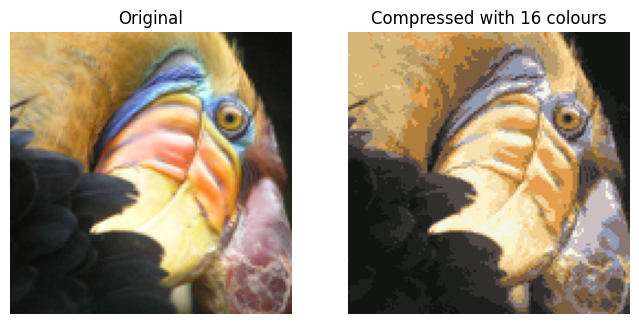

In [14]:

fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_image*255)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()